### Problem Statement:
Design a project from the MNIST dataset to identify digit classification using the SVM algorithm.
#### Importing Necessary Libraries required for the project

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics

_**Read the csv file using pandas**_

In [2]:
df = pd.read_csv("digit_svm.csv")

__Data understanding and Exploration__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.shape

(42000, 785)

In [5]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

_**check if there's any missing values is in the dataset**_

In [8]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
df.label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [10]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

__Check the Unique entries of label column__

In [11]:
np.unique(df['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [12]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**Visualizing the number of class and counts in the dataset**

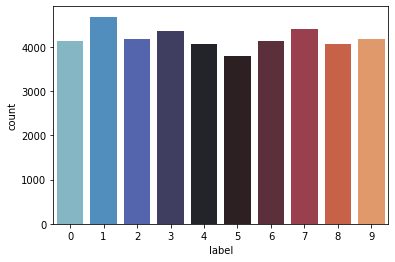

In [13]:
sns.countplot(df["label"],palette = 'icefire')

**Label vs pixel**

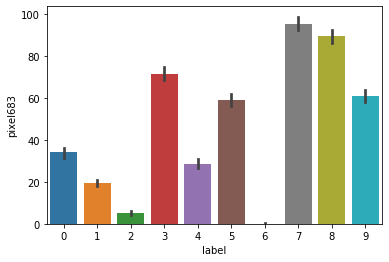

In [14]:
sns.barplot(x='label', y='pixel683', data=df)

###### Visualizing few handwritten digits 
#### We can plot the digits using python matplotlib pyplot imshow  
plotting digits by converting pixels in to matrix,i.e reshape the pixels of the digits in to an array of 28x28 (784)

In [15]:
one = df.iloc[2, 1:].values.reshape(28,28)
one

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        141, 139,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,
        254, 254,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

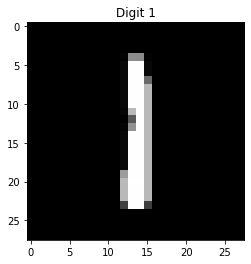

In [16]:
plt.imshow(one,cmap='gray')
plt.title("Digit 1")
plt.show()

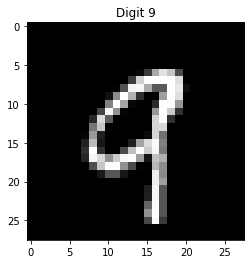

In [17]:
nine = df.iloc[41999, 1:].values.reshape(28,28)
plt.imshow(nine,cmap='gray')
plt.title("Digit 9")
plt.show()

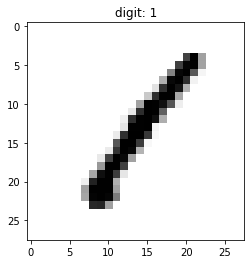

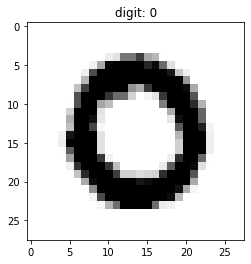

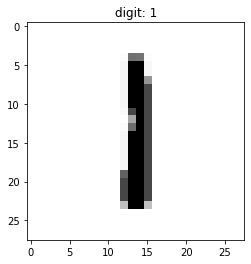

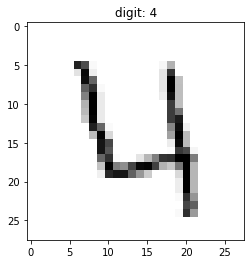

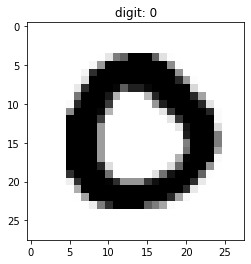

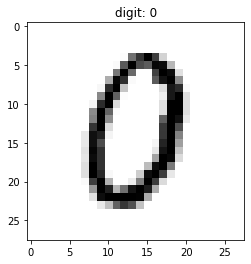

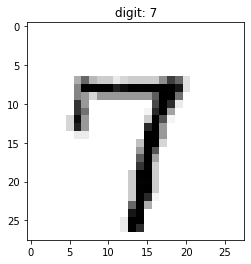

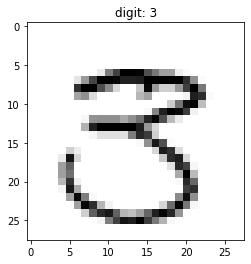

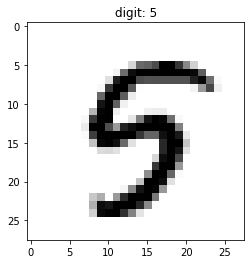

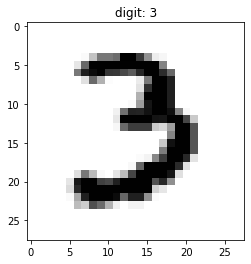

In [19]:
for i in (range(10)):
    dig = df.iloc[i,1:].values.reshape(28, 28)
    plt.imshow(dig, interpolation='nearest', cmap=plt.cm.gray_r)
    plt.title('digit: {0}'. format(df.label[i]))
    plt.show()
    

__Seperating the x and y variables__

In [20]:
x = df.iloc[:,1:]

In [21]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y = df['label']

In [23]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

**Splitting the data into train and test sets.**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.20, random_state = 0)

In [25]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Scaling the features of the dataset.<br>
we use StandardScaler to maintain some realtion between the features***

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
x_train = sc.fit_transform(x_train)

In [30]:
x_test = sc.fit_transform(x_test)

__Data after scaling__

In [31]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**To train the model we use SVM algorithm<br>
SVM SUPPORT VECTOR MACHINES - SUPPORT VECTOR CLASSIFICATION<br>
Building the model - first let's go on with linear model**

In [33]:
clf = SVC(kernel='linear',random_state=0)

In [34]:
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
pred_y = clf.predict(x_test)

In [36]:
pred_y

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [37]:
pred_y.shape

(8400,)

__Classification Metrics__

**Accuracy_score** - It is one metric for evaluating classification model. we use this to measure the performance level of the model.

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,pred_y)

0.919404761904762

__confusion_matrix__

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,pred_y)

array([[778,   0,   7,   4,   3,   6,  11,   0,   3,   1],
       [  0, 947,   4,   1,   0,   1,   1,   2,   5,   0],
       [ 10,   9, 780,  16,  11,   7,   6,   8,  12,   1],
       [  2,   3,  25, 779,   1,  24,   0,   5,  19,   5],
       [  3,   5,   8,   1, 778,   3,   5,   3,   3,  18],
       [  7,   7,   7,  38,   5, 662,   8,   2,  16,   4],
       [  6,   0,  15,   0,  13,  11, 795,   0,   1,   0],
       [  4,   5,  11,   7,  12,   0,   1, 831,   6,  22],
       [  5,  14,  11,  29,   5,  24,   6,   1, 666,   7],
       [ 11,   4,   6,   8,  33,   8,   0,  28,   7, 707]], dtype=int64)

In [42]:
scores=metrics.classification_report(y_test, pred_y, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       813
           1       0.95      0.99      0.97       961
           2       0.89      0.91      0.90       860
           3       0.88      0.90      0.89       863
           4       0.90      0.94      0.92       827
           5       0.89      0.88      0.88       756
           6       0.95      0.95      0.95       841
           7       0.94      0.92      0.93       899
           8       0.90      0.87      0.88       768
           9       0.92      0.87      0.90       812

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



**The linear model gives approx 91.9% accuracy, Since the Accuracy is somewhat less using the SVC linear kernal<br> 
Let's look at a non-linear model with randomly chosen hyperparameters.<br>I'm going to build the model using rbf kernel, C=1, default value of gamma - SVC algorithm .**

In [43]:
classify = SVC(kernel='rbf',random_state=0)

__Train__

In [44]:
classify.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

__predict__

In [45]:
y_p = classify.predict(x_test)

In [46]:
y_p

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

__Accuracy Score__

In [47]:
accuracy_score(y_test,y_p)

0.9577380952380953

__Confusion Matrix__

In [48]:
confusion_matrix(y_test,y_p)

array([[792,   0,   5,   0,   2,   2,   7,   1,   4,   0],
       [  0, 941,  10,   2,   1,   0,   2,   2,   2,   1],
       [  4,   2, 834,   6,   3,   0,   2,   6,   3,   0],
       [  0,   3,  14, 810,   2,  11,   2,   8,  11,   2],
       [  1,   4,  11,   0, 788,   2,   4,   1,   2,  14],
       [  3,   1,   3,   8,   1, 728,   7,   0,   3,   2],
       [  2,   0,  14,   0,   1,   6, 816,   0,   2,   0],
       [  0,   4,  22,   1,   7,   0,   0, 853,   3,   9],
       [  2,   5,   6,   7,   3,  12,   7,   1, 723,   2],
       [  3,   2,   8,   7,   8,   2,   0,  18,   4, 760]], dtype=int64)

__precision, recall and f1-score__

In [49]:
s = metrics.classification_report(y_test, y_p, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(s)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       813
           1       0.98      0.98      0.98       961
           2       0.90      0.97      0.93       860
           3       0.96      0.94      0.95       863
           4       0.97      0.95      0.96       827
           5       0.95      0.96      0.96       756
           6       0.96      0.97      0.97       841
           7       0.96      0.95      0.95       899
           8       0.96      0.94      0.95       768
           9       0.96      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



__As we can see that the Accuracy is increased compared to linear kernel.<br>
 non-linear rbf model gives approx. 95.77% accuracy. <br>Thus, going forward,let's choose hyperparameters corresponding to non-linear rbf models.<br> Taking C=10, gamma=0.001 as best values for the model with optimal hyperparameters__ 

In [50]:
classifier = SVC(C=10, gamma=0.001, kernel='rbf',random_state=0)

__Training the model__

In [51]:
classifier.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

__Predict__

In [52]:
y_pred = classifier.predict(x_test)

In [53]:
y_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

__Check the Accuracy Score__

In [54]:
accuracy_score(y_test,y_pred)

0.9664285714285714

__Confusion Matrix__

In [55]:
confusion_matrix(y_test,y_pred)

array([[794,   0,   6,   0,   3,   2,   5,   0,   3,   0],
       [  0, 945,   9,   2,   0,   0,   1,   2,   2,   0],
       [  3,   1, 840,   7,   1,   0,   1,   5,   2,   0],
       [  1,   2,  12, 817,   2,  10,   0,   7,   9,   3],
       [  1,   6,   9,   0, 791,   2,   5,   2,   1,  10],
       [  2,   0,   3,   6,   1, 735,   5,   0,   4,   0],
       [  1,   0,   9,   0,   2,   5, 824,   0,   0,   0],
       [  0,   4,  15,   0,   4,   0,   0, 866,   2,   8],
       [  1,   3,   2,   4,   3,  11,   5,   2, 736,   1],
       [  3,   2,   5,   5,   9,   2,   0,  12,   4, 770]], dtype=int64)

In [56]:
score=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(score)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       813
           1       0.98      0.98      0.98       961
           2       0.92      0.98      0.95       860
           3       0.97      0.95      0.96       863
           4       0.97      0.96      0.96       827
           5       0.96      0.97      0.97       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.96       899
           8       0.96      0.96      0.96       768
           9       0.97      0.95      0.96       812

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



**We see that with hyperparameter - C = 10 and gamma = 0.001, we see overall accuracy of the model is 97% and also precision for each label is above 95%..
so now I'm going to test the model using the hadwritten digit dataset which i prepared to check how the model is predicitng.<br> The name of the dataset is hand_written.csv**

In [57]:
hd = pd.read_csv('hand_written.csv')

In [58]:
hd

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Seperating the feature and the label from the dataset__

In [59]:
h_test= hd.iloc[:,1:]
h_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
h_test.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
h_y = hd["label"]
h_y

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9    0
Name: label, dtype: int64

__Scaling the features of the dataset__

In [62]:
h_test= sc.fit_transform(h_test)

In [63]:
h_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

__predict__

In [64]:
predict_y = clf.predict(h_test)

In [65]:
predict_y

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0], dtype=int64)

__Accuracy score__

In [66]:
accuracy_score(h_y,predict_y)

1.0

In [67]:
accuracy_score(h_y,predict_y)*100

100.0

__confusion matrix__

In [68]:
confusion_matrix(h_y,predict_y)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [69]:
scores=metrics.classification_report(h_y, predict_y, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



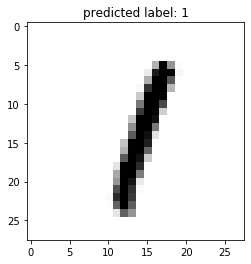

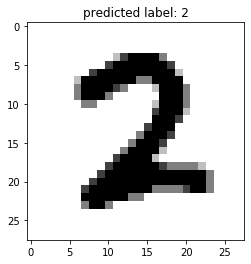

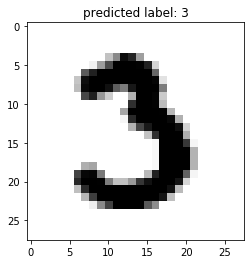

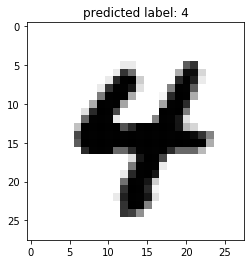

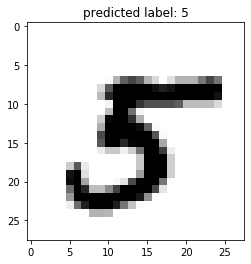

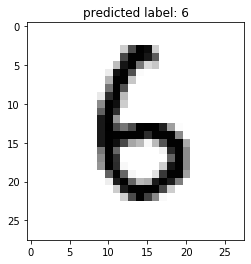

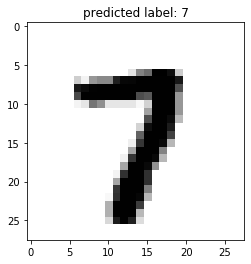

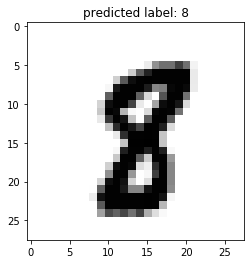

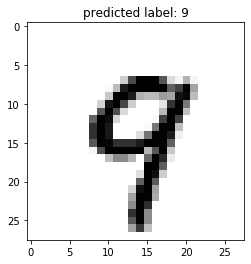

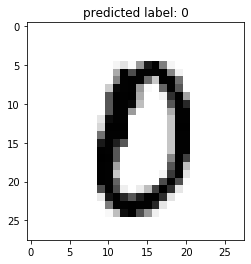

In [70]:
for i in (range(10)):
    digit = hd.iloc[i,1:].values.reshape(28, 28)
    plt.imshow(digit, interpolation='nearest', cmap=plt.cm.gray_r)
    plt.title('predicted label: {0}'. format(predict_y[i]))
    plt.show()

__As we can see that all the hand_written digits are predicted correctly and the Accuracy is 100%__